# Assignment 4, 05/14/2018

## Prepared by Duygu Sonmez Tabak

In this assignment, we will perform a set of data preparation tasks to manipulate the data. 

### Importing Libraries

In [451]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Loading & Inspecting the Dataset

In [452]:
# Load in the data with 'read_csv()'
video = pd.read_csv("/Users/duygusonmez/Desktop/Assignment4/Video_Store.csv",
                     header=None)

In [453]:
video.describe()

,0,1,2,3,4,5,6,7
count,51,51,51,51,51,51,51,51
unique,51,3,37,26,33,28,3,4
top,39,M,29000,25,19,3.3,Yes,Drama
freq,1,26,3,7,3,3,26,20


In [454]:
video.head()

,0,1,2,3,4,5,6,7
0,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
1,1,M,45000,25,27,2.5,Yes,Action
2,2,F,54000,33,12,3.4,No,Drama
3,3,F,32000,20,42,1.6,No,Comedy
4,4,F,59000,70,16,4.2,Yes,Drama


### Cleaning the Dataset

Since the dataset has no missing values, we don't need to deal with them in this particular case.

In [455]:
# Assigning column names
video_features = ["Cust_ID", "Gender", "Income", "Age", "Rentals",
                  "Avg_Per_Visit", "Incidentals", "Genre"] 
video.columns = video_features

In [456]:
# Dropping the first row
video.drop(video.index[0], inplace=True)

In [457]:
video.head()

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre
1,1,M,45000,25,27,2.5,Yes,Action
2,2,F,54000,33,12,3.4,No,Drama
3,3,F,32000,20,42,1.6,No,Comedy
4,4,F,59000,70,16,4.2,Yes,Drama
5,5,M,37000,35,25,3.2,Yes,Action


### Data Preparation Tasks

##### a) Use smoothing by bin means to smooth the values of the Age attribute. Use a bin depth of 4.

In [458]:
video[['Age']] = video[['Age']].apply(pd.to_numeric)
video['Age'].max()

70

In [459]:
video['Age'].min()

15

In [460]:
videoBins = video.groupby(pd.cut(video["Age"], 4))
print(videoBins.aggregate(lambda x: np.mean(x[x > 0.5])))
print(videoBins.mean().Age)

                      Cust_ID         Income        Age       Rentals
Age                                                                  
(14.945, 28.75]  5.951787e+38  1.956536e+110  21.391304  1.192319e+44
(28.75, 42.5]    1.476554e+30   3.176492e+83  34.235294  7.207132e+31
(42.5, 56.25]    7.924586e+15   3.222314e+43  48.222222  2.126792e+15
(56.25, 70.0]    4.000000e+00   5.900000e+04  70.000000  1.600000e+01
Age
(14.945, 28.75]    21.391304
(28.75, 42.5]      34.235294
(42.5, 56.25]      48.222222
(56.25, 70.0]      70.000000
Name: Age, dtype: float64


In [461]:
video.loc[video['Age'] >= 56.25, 'Age_bins'] = 70
video.loc[(video['Age'] < 56.25) & (video['Age'] < 42.5), 'Age_bins'] = 48 
video.loc[(video['Age'] < 42.5) & (video['Age'] > 28.75), 'Age_bins'] = 34
video.loc[video['Age'] < 28.75, 'Age_bins'] = 21

In [462]:
video.head()

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Age_bins
1,1,M,45000,25,27,2.5,Yes,Action,21.0
2,2,F,54000,33,12,3.4,No,Drama,34.0
3,3,F,32000,20,42,1.6,No,Comedy,21.0
4,4,F,59000,70,16,4.2,Yes,Drama,70.0
5,5,M,37000,35,25,3.2,Yes,Action,34.0


##### b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0].

In [463]:
video['Income'] = pd.to_numeric(video['Income'])

In [464]:
v_min = min(video['Income'])

In [465]:
v_max = max(video['Income'])

In [466]:
normalized_Income = (video['Income']-v_min)/(v_max-v_min)

In [467]:
video['Income_Normalized'] = normalized_Income

In [468]:
video.head(3)

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Age_bins,Income_Normalized
1,1,M,45000,25,27,2.5,Yes,Action,21.0,0.500000
2,2,F,54000,33,12,3.4,No,Drama,34.0,0.602273
3,3,F,32000,20,42,1.6,No,Comedy,21.0,0.352273


##### c) Use z-score normalization to standardize the values of the Rentals attribute.

In [476]:
video['Rentals'] = pd.to_numeric(video['Rentals'])

In [477]:
v_mean = video['Rentals'].mean()

In [478]:
v_std = video['Rentals'].std()

In [479]:
normalized_Rentals = (video['Rentals'] - v_mean)/v_std

In [480]:
video['Rentals_Normalized'] = normalized_Rentals

In [481]:
video.head(3)

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Age_bins,Income_Normalized,Income_Discretized,Gender_Binary,Incidentals_Binary,Genre_converted,Rentals_Normalized
1,1,M,45000,25,27,2.5,Yes,Action,21.0,0.500000,Medium,1,1,1.0,0.075791
2,2,F,54000,33,12,3.4,No,Drama,34.0,0.602273,Medium,0,0,2.0,-1.420076
3,3,F,32000,20,42,1.6,No,Comedy,21.0,0.352273,Medium,0,0,3.0,1.571657


##### d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K

In [482]:
video.loc[video['Income'] >= 60000, 'Income_Discretized'] = 'High' 
video.loc[video['Income'] < 25000, 'Income_Discretized'] = 'Low'  
video.loc[(video['Income'] >= 25000) & (video['Income'] < 60000), 'Income_Discretized'] = 'Medium'

In [483]:
video.head()

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Age_bins,Income_Normalized,Income_Discretized,Gender_Binary,Incidentals_Binary,Genre_converted,Rentals_Normalized
1,1,M,45000,25,27,2.5,Yes,Action,21.0,0.500000,Medium,1,1,1.0,0.075791
2,2,F,54000,33,12,3.4,No,Drama,34.0,0.602273,Medium,0,0,2.0,-1.420076
3,3,F,32000,20,42,1.6,No,Comedy,21.0,0.352273,Medium,0,0,3.0,1.571657
4,4,F,59000,70,16,4.2,Yes,Drama,70.0,0.659091,Medium,0,1,2.0,-1.021178
5,5,M,37000,35,25,3.2,Yes,Action,34.0,0.409091,Medium,1,1,1.0,-0.123658


##### e) Convert the original data (not the results of parts a-d) into the standard spreadsheet format (note that this requires that you create, for every categorical attribute, additional attributes corresponding to values of that categorical attribute; numerical attributes in the original data remain unchanged).

In [484]:
video['Gender_Binary'] = (video['Gender'] == 'M').astype(int)

In [485]:
video['Incidentals_Binary'] = (video['Incidentals'] == 'Yes').astype(int)

In [486]:
video.loc[video['Genre'] == 'Action', 'Genre_converted'] = 1
video.loc[video['Genre'] == 'Drama', 'Genre_converted'] = 2
video.loc[video['Genre'] == 'Comedy', 'Genre_converted'] = 3

In [487]:
video['Genre_converted'] = pd.to_numeric(video['Genre_converted'])

In [488]:
original_video = video.drop(['Income_Normalized', 'Rentals_Normalized', 
                             'Income_Discretized', 'Age_bins'],axis=1) 

In [413]:
original_video.head()

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Gender_Binary,Incidentals_Binary,Genre_converted
1,1,M,45000,25,27,2.5,Yes,Action,1,1,1.0
2,2,F,54000,33,12,3.4,No,Drama,0,0,2.0
3,3,F,32000,20,42,1.6,No,Comedy,0,0,3.0
4,4,F,59000,70,16,4.2,Yes,Drama,0,1,2.0
5,5,M,37000,35,25,3.2,Yes,Action,1,1,1.0


##### f) Using the standardized data set (from part e), perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You need to construct a complete Correlation Matrix (Please read the brief document Basic Correlation Analysis (see course website) for more detail). Can you observe any "significant" patterns among groups of two or more variables? Explain.

In [489]:
# Correlation Matrix
corr = original_video.corr()
corr 

,Income,Age,Rentals,Gender_Binary,Incidentals_Binary,Genre_converted
Income,1.000000,0.627013,-0.274873,-0.063841,-0.063841,0.267340
Age,0.627013,1.000000,-0.549611,-0.227663,-0.214184,0.310994
Rentals,-0.274873,-0.549611,1.000000,-0.025164,0.297452,-0.222630
Gender_Binary,-0.063841,-0.227663,-0.025164,1.000000,0.198718,-0.202973
Incidentals_Binary,-0.063841,-0.214184,0.297452,0.198718,1.000000,-0.464537
Genre_converted,0.267340,0.310994,-0.222630,-0.202973,-0.464537,1.000000


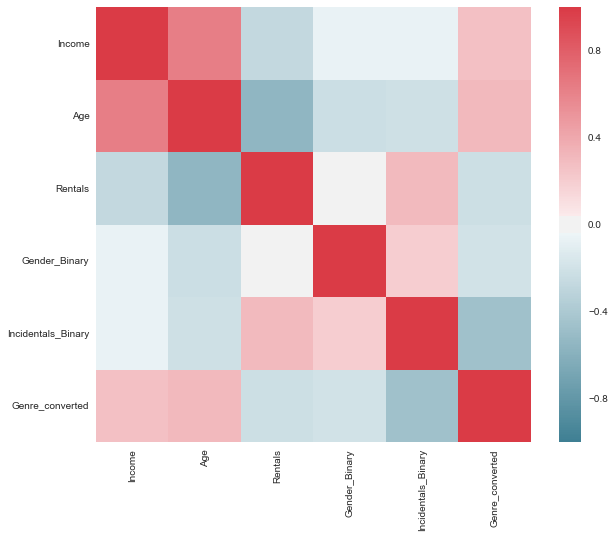

In [490]:
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax) 
plt.show()

/Users/duygusonmez/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


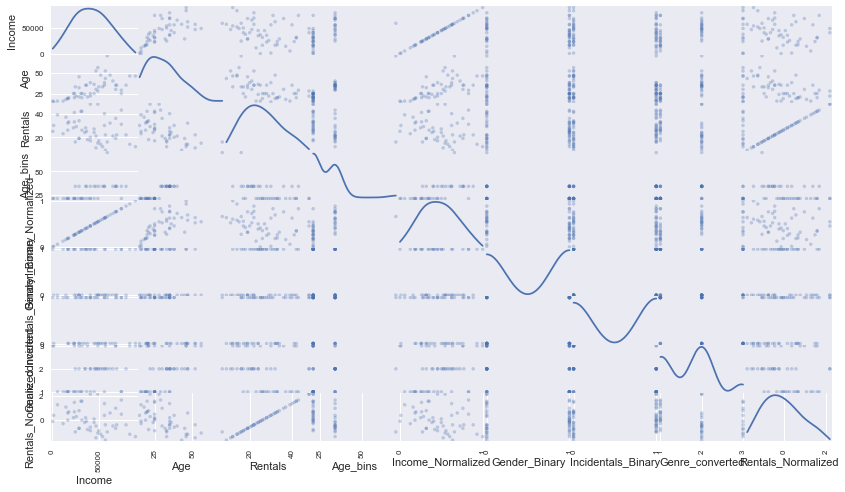

In [491]:
pd.scatter_matrix(video, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

Based on the correlation visual outputs, we can say the points below. 
* Income and Genre have strong correlation. Customers who fall into the same pay scale, tend to have similar movie preferences. 
* Rentals and Incidentals have correlation as customers who rent video more often, tend to get Incidentals. 
* Incidentals and Genre have negative correlation.
* Rentals  and Income have negative correlation which means customers who rent videos frequently, tend to get paid lower compared to customers who rent videos occasionaly. 

##### g) Perform a cross-tabulation of the two "gender" variables versus the three "genre" variables. Show this as a 2 x 3 table with entries representing the total counts. 

In [492]:
my_tab = pd.crosstab(original_video['Gender_Binary'], original_video['Genre_converted'])
my_tab

Genre_converted,1.0,2.0,3.0
Gender_Binary,,,
0,5,13,6
1,13,7,6


##### Then, use a graph or chart that provides the best visualization of the relationships between these sets of variables. Can you draw any significant conclusions?

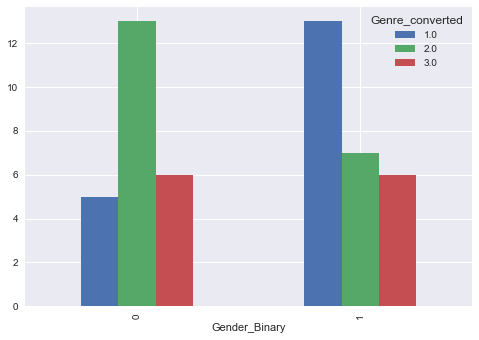

In [439]:
my_tab.plot.bar()
plt.show()

Insights based on the crosstab analysis: 
* Majority of women love Drama. 
* Majority of men love Action. 

##### h) Select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). Then, create a summary (e.g., using means, medians, and/or other statistics) of the selected data with respect to all other attributes. Can you observe any significant patterns that characterize this segment of customers? Explain.

In [493]:
data = original_video.loc[(original_video['Rentals'] > 30)] 
data

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Gender_Binary,Incidentals_Binary,Genre_converted
3,3,F,32000,20,42,1.6,No,Comedy,0,0,3.0
6,6,M,18000,20,33,1.7,No,Action,1,0,1.0
8,8,M,74000,25,31,2.4,Yes,Action,1,1,1.0
11,11,F,41000,22,48,2.3,Yes,Drama,0,1,2.0
15,15,M,68000,30,36,2.7,Yes,Comedy,1,1,3.0
18,18,F,6000,16,39,1.8,Yes,Action,0,1,1.0
19,19,F,24000,25,41,3.1,No,Comedy,0,0,3.0
26,26,F,56000,35,40,2.6,Yes,Action,0,1,1.0
27,27,F,62000,47,32,3.6,No,Drama,0,0,2.0
29,29,F,15000,18,37,2.1,Yes,Action,0,1,1.0


In [494]:
data.describe()

,Income,Age,Rentals,Gender_Binary,Incidentals_Binary,Genre_converted
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,38750.000000,25.000000,38.187500,0.437500,0.562500,1.687500
std,22308.443842,7.745967,5.552402,0.512348,0.512348,0.873212
min,6000.000000,16.000000,31.000000,0.000000,0.000000,1.000000
25%,22500.000000,20.000000,33.000000,0.000000,0.000000,1.000000
50%,31500.000000,23.500000,38.000000,0.000000,1.000000,1.000000
75%,57500.000000,28.250000,42.000000,1.000000,1.000000,2.250000
max,74000.000000,47.000000,48.000000,1.000000,1.000000,3.000000


##### Note: To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.

In [495]:
original_video.describe()

,Income,Age,Rentals,Gender_Binary,Incidentals_Binary,Genre_converted
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,42300.000000,31.560000,26.240000,0.520000,0.520000,1.880000
std,21409.753642,12.000272,10.027635,0.504672,0.504672,0.773014
min,1000.000000,15.000000,9.000000,0.000000,0.000000,1.000000
25%,26750.000000,22.000000,19.000000,0.000000,0.000000,1.000000
50%,41000.000000,30.000000,25.000000,1.000000,1.000000,2.000000
75%,56750.000000,37.500000,32.750000,1.000000,1.000000,2.000000
max,89000.000000,70.000000,48.000000,1.000000,1.000000,3.000000


Here are the insights based on the comparison of statistical summaries of the data with all customers and the data with only good customers.
* Good customers have higher Income. 
* Women are dominant in Good customers. On the other hand, the population of women and men are similar in all customers. 
* Good customers are more interested in Action movies. 
* Good customers are more likely to get Incidentals compared to the rest of the customers. 

##### i) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished (e.g., should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.

In [496]:
data_Inc = data.loc[(original_video['Incidentals'] == 'Yes')] 
data_Inc

,Cust_ID,Gender,Income,Age,Rentals,Avg_Per_Visit,Incidentals,Genre,Gender_Binary,Incidentals_Binary,Genre_converted
8,8,M,74000,25,31,2.4,Yes,Action,1,1,1.0
11,11,F,41000,22,48,2.3,Yes,Drama,0,1,2.0
15,15,M,68000,30,36,2.7,Yes,Comedy,1,1,3.0
18,18,F,6000,16,39,1.8,Yes,Action,0,1,1.0
26,26,F,56000,35,40,2.6,Yes,Action,0,1,1.0
29,29,F,15000,18,37,2.1,Yes,Action,0,1,1.0
35,35,M,74000,29,43,4.6,Yes,Action,1,1,1.0
43,43,F,49000,28,48,3.3,Yes,Drama,0,1,2.0
49,49,M,31000,25,42,3.4,Yes,Action,1,1,1.0


In [497]:
data_Inc.describe()

,Income,Age,Rentals,Gender_Binary,Incidentals_Binary,Genre_converted
count,9.000000,9.000000,9.000000,9.000000,9.0,9.000000
mean,46000.000000,25.333333,40.444444,0.444444,1.0,1.444444
std,24929.901725,6.000000,5.547772,0.527046,0.0,0.726483
min,6000.000000,16.000000,31.000000,0.000000,1.0,1.000000
25%,31000.000000,22.000000,37.000000,0.000000,1.0,1.000000
50%,49000.000000,25.000000,40.000000,0.000000,1.0,1.000000
75%,68000.000000,29.000000,43.000000,1.000000,1.0,2.000000
max,74000.000000,35.000000,48.000000,1.000000,1.0,3.000000


In order to increase the sales of Incidentals, a campaign should be launched towards a target customer segment who
* likes either Action or Drama
* have high Income 

Also, women are more likely to get Incidentals compared to men. 